In [2]:
import joblib
lr = joblib.load('lr.model')

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,confusion_matrix,precision_score,recall_score,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns;
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
#----------------------cm--------------------------------
def print_confusion_matrix(y_test,predict_x_test):
    cnf = confusion_matrix(y_test,predict_x_test)
    print(cnf)
    #準確度
    accuracy = accuracy_score(y_test,predict_x_test)
    print('Accuracy:', round(accuracy,2))
#     #精確度
#     precision = precision_score(y_test,predict_x_test)
#     print('Precision:', round(precision,2))
    #sensitivity
    recall = recall_score(y_test,predict_x_test)
    print('Sensitivity:', round(recall,1))
    #specificity
    tn1, fp1, fn1, tp1 = confusion_matrix(y_test, predict_x_test).ravel()
    specificity = tn1 / (tn1 + fp1)
    print('Specificity:', round(specificity,2))
#----------------------plot---------------------------------
def draw_confusion_matrix(y_test,predict_x_test):
    cnf = confusion_matrix(y_test,predict_x_test)
    sns.set()
    sns.heatmap(cnf,annot=True,fmt='.20g')
    plt.xlabel("predic")
    plt.ylabel("true")
#------------------------------------------------------

LR_cm
[[84 27]
 [48 78]]
Accuracy: 0.68
Sensitivity: 0.6
Specificity: 0.76


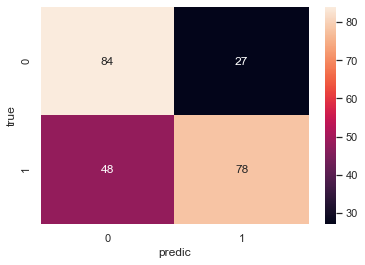

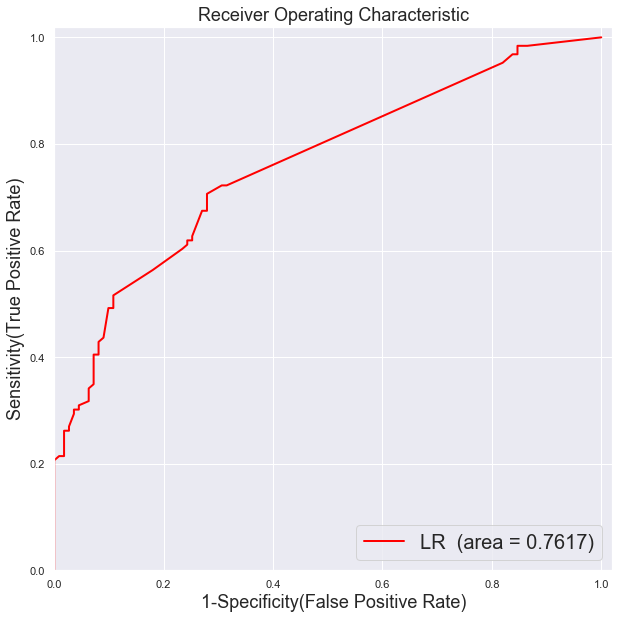

Cut Point: 0.43
[[77 34]
 [35 91]]
Accuracy: 0.71
Sensitivity: 0.7
Specificity: 0.69


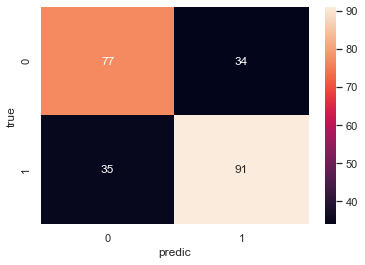

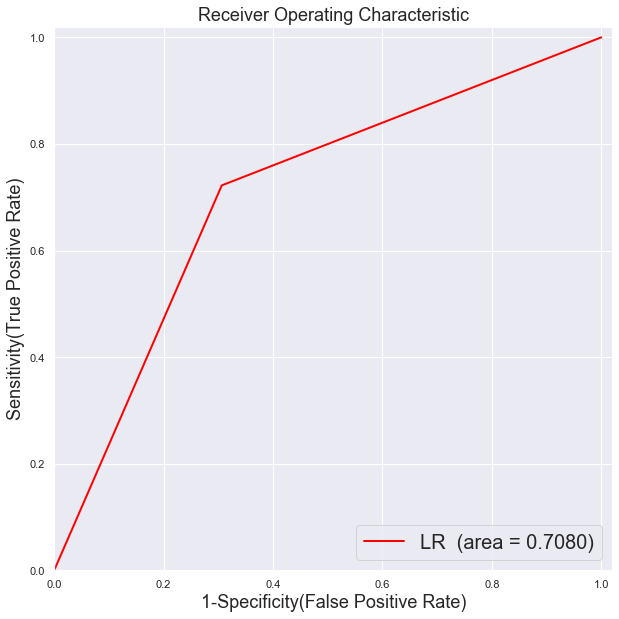

In [6]:
df = pd.read_csv("80%_Factor1_1.csv")
df.columns =["ID","CANCER","ID_S","BIRTH_YM","FUNC_DATE","AGE","789","521","V70.00","466","460","558","V04.80",
             "692","533","463","522","784","462","366","461","V76.20","719","487","525","599","600","786","848",
             "786","477","708","727","595","716","787","490","733","723","698","272","491","386","413","496",
             "V43.10","427","434","627","486","738","682","491","570","428","251","410","540","590","810","996",
             "852","250","274","300","372","401","402","414","464","465","523","528","535","536","564","571","715",
             "721","724","729","780","157","531","532","574","576","577","592"]

x = df[["789","533","787","535","536","571","780","576","577"]]
y = df[["CANCER"]]

x1 = np.array(x)
y1 = np.array(y)

#測試集的資料
lr.predict(x_test)

#計算混淆矩陣
print('LR_cm')
print_confusion_matrix(y_test,lr.predict(x_test))

#畫混淆矩陣圖
draw_confusion_matrix(y_test,lr.predict(x_test))

y_score = lr.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,  y_score)
roc_auc = auc(fpr, tpr)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic',fontsize=18)
lw = 2
plt.plot(fpr, tpr, color='red', lw=lw, label='LR  (area = %0.4f)' % roc_auc)
#x,y軸的範圍
plt.xlim([0.0, 1.02])
plt.ylim([0.0, 1.02])
#x,y軸的名稱
plt.ylabel('Sensitivity(True Positive Rate)',fontsize=18)
plt.xlabel('1-Specificity(False Positive Rate)',fontsize=18)
#圖示
plt.legend(loc="lower right",fontsize=20)
plt.show()
# print("------------------------------以下為最佳切點---------------------------------------------")
thresh = 0.43
print("Cut Point:",thresh)
y_pred = (y_score > thresh).astype(np.uint8)
print_confusion_matrix(y_test,y_pred)

draw_confusion_matrix(y_test,y_pred)

y_score = lr.predict_proba(x_test)[:,1] 
fpr, tpr, threshold = roc_curve(y_test,  y_score>thresh)
roc_auc = auc(fpr, tpr)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic',fontsize=18)
lw = 2
plt.plot(fpr, tpr, color='red', lw=lw, label='LR  (area = %0.4f)' % roc_auc)
#x,y軸的範圍
plt.xlim([0.0, 1.02])
plt.ylim([0.0, 1.02])
#x,y軸的名稱
plt.ylabel('Sensitivity(True Positive Rate)',fontsize=18)
plt.xlabel('1-Specificity(False Positive Rate)',fontsize=18)
#圖示
plt.legend(loc="lower right",fontsize=20)
plt.show()

In [7]:
print(y_score)
print(y_pred)

[0.8660564  0.42140924 0.44926974 0.4966388  0.99163425 0.38205744
 0.75326292 0.38205744 0.22781046 0.5923543  0.44926974 0.38205744
 0.55289285 0.61941733 0.55289285 0.38205744 0.7225104  0.73177549
 0.76374834 0.90572772 0.62720478 0.55289285 0.53636011 0.96399296
 0.35567316 0.82969547 0.38205744 0.674025   0.38205744 0.38205744
 0.698231   0.70894796 0.95303131 0.38205744 0.88555895 0.94519617
 0.38205744 0.66409222 0.38205744 0.38205744 0.76499569 0.3710942
 0.61941733 0.44530779 0.38205744 0.53636011 0.44926974 0.38205744
 0.22781046 0.38205744 0.38205744 0.53636011 0.53636011 0.83699393
 0.76499569 0.38205744 0.674025   0.94773386 0.38205744 0.53636011
 0.38205744 0.82934292 0.90671493 0.38205744 0.38205744 0.88555895
 0.38205744 0.38205744 0.22781046 0.43713058 0.38205744 0.53636011
 0.61941733 0.44926974 0.68228197 0.43713058 0.55289285 0.98627461
 0.38205744 0.38205744 0.38205744 0.38205744 0.38205744 0.38205744
 0.76499569 0.53636011 0.38205744 0.38205744 0.43774408 0.55289

In [8]:
import joblib
joblib.dump(lr, 'lr.model')
lr = joblib.load('lr.model')